# Data Preproscessing

In [ ]:
# import library yang dibutuhkan

import pandas as pd 
import numpy as np                     #untuk kalkulasi mathematic
import seaborn as sns                  #Untuk visualisasi data
import matplotlib.pyplot as plt        #Untuk plotting graphs 
from matplotlib import rcParams
%matplotlib inline
import warnings                        #Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")

In [ ]:
# load dataset

url = 'https://drive.google.com/file/d/1UJ07j4gSGHTDpw53wO3L2y4eoXesZbMN/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

#mengimpor dataset
df = pd.read_csv(dwn_url)

In [ ]:
# membagi feature berdasarkan value numerik dan kategori 

cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
nums = ['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']  

## Handle Missing Values

In [ ]:
# melihat jumlah missing value disetiap feature

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Tidak ada nilai yang kosong pada kolom**, sehingga tidak dilakukan handling missing value.

## Handle Duplicated Data

In [ ]:
# melihat jumlah duplikat

df.duplicated().sum()

125

In [ ]:
df[df.duplicated(keep=False) == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [ ]:
print(f'Jumlah row duplicated SEBELUM dihapus {df.duplicated().sum()}')

# menghapus duplikat

df.drop_duplicates(inplace=True)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')

Jumlah row duplicated SEBELUM dihapus 125
Jumlah row duplicated SETELAH dihapus 0


In [ ]:
# inisiasi update datadrame

df = df.drop_duplicates()

## Handle Outliers

In [ ]:
#Cek outlier

from scipy import stats
filtered_entries = np.array([True] * len(df))

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in nums:
    zscore = abs(stats.zscore(df[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df1 = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')
print(f'Prsentase outlier: {round((len(df)-len(df1))/len(df)*100, 2)}%')


Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020
Prsentase outlier: 17.9%


Presentase outlier dalam data 17.90%, nilai tersebut cukup besar, maka outlier tidak dihilangkan. Tidak dilakukan handle juga karena outlier ini bukan dari kesalahan dalam pengambilan data.

## Feature Transformation

Transformasi feature tidak menggunakan log karena data memiliki banyak value dengan nilai 0. PowerTransformer Yeo-Johnson dipilih untuk membuat distribusi lebih mendekati normal (Guassian) dan mendukung value data memiliki nilai positif atau negatif.

In [ ]:
# transformasi data

from sklearn.preprocessing import PowerTransformer

for x in nums:
    pt = PowerTransformer(method='yeo-johnson')
    df[x] = pt.fit_transform(df[x].to_frame())

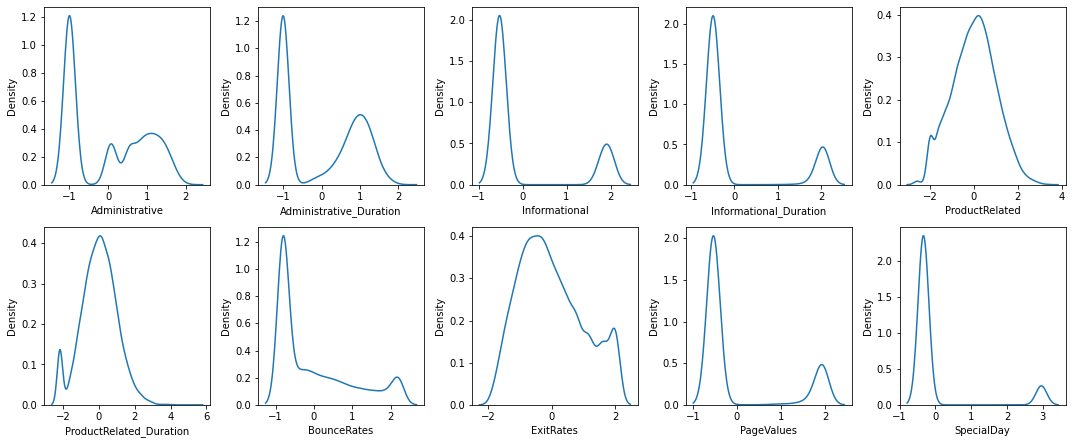

In [ ]:
# cek distribusi data

features = nums
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,Feb,1,1,1,1,Returning_Visitor,False,False
1,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,1.610382,-0.532801,-0.33763,Feb,2,2,1,2,Returning_Visitor,False,False
2,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,Feb,4,1,9,3,Returning_Visitor,False,False
3,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.938936,1.772681,1.867073,-0.532801,-0.33763,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,0.039282,0.827019,0.762250,-0.532801,-0.33763,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.834177,1.117196,-0.523851,-0.494799,0.975836,0.804599,-0.068325,0.018165,1.918193,-0.33763,Dec,4,6,1,1,Returning_Visitor,True,False
12326,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.147834,-0.802948,-0.355710,-0.532801,-0.33763,Nov,3,2,1,8,Returning_Visitor,True,False
12327,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.654912,2.089475,1.464595,-0.532801,-0.33763,Nov,3,2,1,13,Returning_Visitor,True,False
12328,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.33763,Nov,2,2,3,11,Returning_Visitor,False,False


## Feature Encoding

**Handle Feature VisitorType**

In [ ]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

Value `Other` diinisiai kedalam `ReturningVisitor` (modus).

In [ ]:
df['VisitorType'].replace('Other', 'Returning_Visitor', inplace=True)

**Update Feature Kategori**

In [ ]:
cats_updated = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [ ]:
for col in cats_updated:
    print(f'Value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value counts of column Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
------------------------------ 

Value counts of column OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
------------------------------ 

Value counts of column Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
------------------------------ 

Value counts of column Region
1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
------------------------------ 

Value counts of column TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40

**Strategi Encoding**:
> OperatingSystems, Browser, Region, TrafficType sudah memiliki feature numerik <br>
> Month akan dilakukan label encoding <br>
> VisitorType, Weekend, dan Revenue akan dilakukan One Hot Encoding <br>

### Label Encoding

**Month**

In [ ]:
# membuat label peringkat berdasarkan jumlah peringkat user dari yang terbesar

month = df['Month'].value_counts().reset_index()
month_df = pd.DataFrame(month)
month_df['Month'] = (month_df['Month'].rank(ascending=False)).astype(int)
month_df

,index,Month
0,May,1
1,Nov,2
2,Mar,3
3,Dec,4
4,Oct,5
5,Sep,6
6,Aug,7
7,Jul,8
8,June,9
9,Feb,10


In [ ]:
# mapping ke dataframe (run kode 1 x)

mapping_month = month_df.set_index('index')['Month'].to_dict()

df['Month'] = df['Month'].map(mapping_month)

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,1,1,1,1,Returning_Visitor,False,False
1,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,1.610382,-0.532801,-0.33763,10,2,2,1,2,Returning_Visitor,False,False
2,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,4,1,9,3,Returning_Visitor,False,False
3,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.938936,1.772681,1.867073,-0.532801,-0.33763,10,3,2,2,4,Returning_Visitor,False,False
4,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,0.039282,0.827019,0.762250,-0.532801,-0.33763,10,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.834177,1.117196,-0.523851,-0.494799,0.975836,0.804599,-0.068325,0.018165,1.918193,-0.33763,4,4,6,1,1,Returning_Visitor,True,False
12326,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.147834,-0.802948,-0.355710,-0.532801,-0.33763,2,3,2,1,8,Returning_Visitor,True,False
12327,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.654912,2.089475,1.464595,-0.532801,-0.33763,2,3,2,1,13,Returning_Visitor,True,False
12328,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.33763,2,2,2,3,11,Returning_Visitor,False,False


### One Hot Encoding

In [ ]:
for cat in ['VisitorType', 'Weekend', 'Revenue']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
# drop kolom yang tidak dibutuhkan

df = df.drop(columns=['VisitorType', 'Weekend', 'Revenue', 'VisitorType_New_Visitor', 'Weekend_False', 'Revenue_False'])

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,1,1,1,1,1,0,0
1,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,1.610382,-0.532801,-0.33763,10,2,2,1,2,1,0,0
2,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,10,4,1,9,3,1,0,0
3,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.938936,1.772681,1.867073,-0.532801,-0.33763,10,3,2,2,4,1,0,0
4,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,0.039282,0.827019,0.762250,-0.532801,-0.33763,10,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.834177,1.117196,-0.523851,-0.494799,0.975836,0.804599,-0.068325,0.018165,1.918193,-0.33763,4,4,6,1,1,1,1,0
12326,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.147834,-0.802948,-0.355710,-0.532801,-0.33763,2,3,2,1,8,1,1,0
12327,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.654912,2.089475,1.464595,-0.532801,-0.33763,2,3,2,1,13,1,1,0
12328,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.33763,2,2,2,3,11,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  float64
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  float64
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  float64
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  Month                          12205 non-null  int64  
 11  OperatingSystems               12205 non-null  int64  
 12  Browser                        12205 non-null 

## Handle Class Imbalance

In [ ]:
# pembuatan binary label target
df['revenue'] = df['Revenue_True'] == 1
df['revenue'].value_counts()

False    10297
True      1908
Name: revenue, dtype: int64

In [ ]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['revenue', 'Revenue_True']]]
y = df['revenue'].values
print(X.shape)
print(y.shape)

(12205, 17)
(12205,)


In [ ]:
from imblearn import under_sampling, over_sampling

X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    10297
True      1908
dtype: int64


UNDERSAMPLING
False    3816
True     1908
dtype: int64


OVERSAMPLING
False    10297
True      5148
dtype: int64


SMOTE
False    10297
True      5148
dtype: int64


## Feature Selection

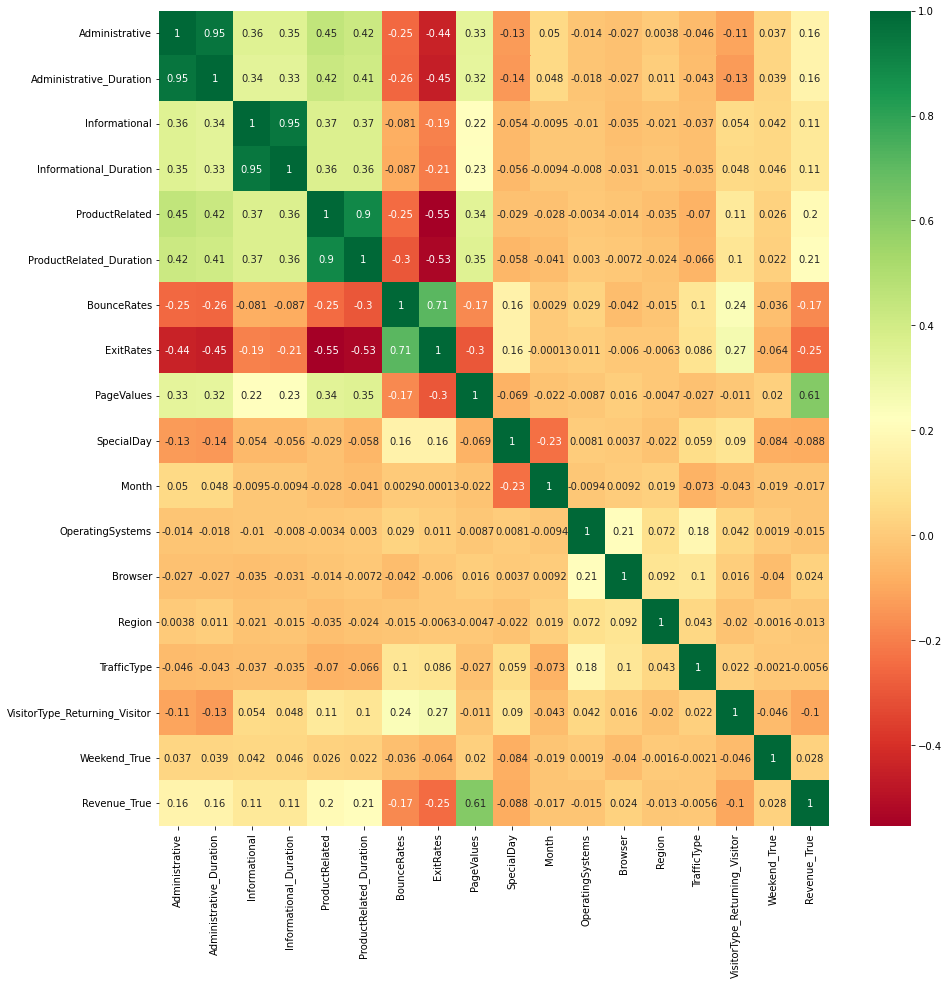

In [ ]:
corrmat = df.loc[:, df.columns != 'revenue'].corr()
top_corr_features = corrmat.index 

plt.figure(figsize=(15,15)) 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# memilih feature dengn korelasi tinggi dengan Revenue

x = corrmat['Revenue_True'] 
result = x[(x>0.05)|(x<-0.05)] # korelasi lebih dari 0.1
result

Administrative                   0.164376
Administrative_Duration          0.164306
Informational                    0.110966
Informational_Duration           0.107878
ProductRelated                   0.196981
ProductRelated_Duration          0.211123
BounceRates                     -0.172585
ExitRates                       -0.249863
PageValues                       0.611599
SpecialDay                      -0.088071
VisitorType_Returning_Visitor   -0.102694
Revenue_True                     1.000000
Name: Revenue_True, dtype: float64

Pada tahap feature selection ini fitur yang redundant adalah :
- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>
- BounceRates - ExitRates <br>

- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>

ketiganya akan dibuat feature extraction untuk mendapatkan durasi tiap page nya, sedangkan BounceRates - ExitRates, akan dipilih salah satu, yaitu ExitRates 


## Feature Extraction

In [ ]:
df['Duration per Page Administrative'] = df['Administrative'] / df['Administrative_Duration']
df['Duration per Page Informational'] = df['Informational'] / df['Informational_Duration']
df['Duration per Page ProductRelated'] = df['ProductRelated'] / df['ProductRelated_Duration']

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType_Returning_Visitor,Weekend_True,Revenue_True,revenue,Duration per Page Administrative,Duration per Page Informational,Duration per Page ProductRelated
0,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,...,1,1,1,1,0,0,False,0.993044,1.058716,0.911677
1,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,1.610382,-0.532801,-0.33763,...,2,1,2,1,0,0,False,0.993044,1.058716,1.453281
2,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,...,1,9,3,1,0,0,False,0.993044,1.058716,0.911677
3,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.938936,1.772681,1.867073,-0.532801,-0.33763,...,2,2,4,1,0,0,False,0.993044,1.058716,0.835840
4,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,0.039282,0.827019,0.762250,-0.532801,-0.33763,...,3,1,4,1,1,0,False,0.993044,1.058716,-11.872978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.834177,1.117196,-0.523851,-0.494799,0.975836,0.804599,-0.068325,0.018165,1.918193,-0.33763,...,6,1,1,1,1,0,False,0.746670,1.058716,1.212822
12326,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.147834,-0.802948,-0.355710,-0.532801,-0.33763,...,2,1,8,1,1,0,False,0.993044,1.058716,6.814829
12327,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.654912,2.089475,1.464595,-0.532801,-0.33763,...,2,1,13,1,1,0,False,0.993044,1.058716,1.328869
12328,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.33763,...,2,3,11,1,0,0,False,1.149934,1.058716,0.402332


**Data yang dipilih**

In [ ]:
df_selection=df[['Duration per Page Administrative','Duration per Page Informational','Duration per Page ProductRelated','ExitRates',
              'PageValues','SpecialDay','Month','VisitorType_Returning_Visitor','Revenue_True']]